Number of nodes: 34
Number of edges: 78
Detected 3 communities
Top 5 nodes by betweenness centrality:
Node 0: 0.438
Node 33: 0.304
Node 32: 0.145
Node 2: 0.144
Node 31: 0.138


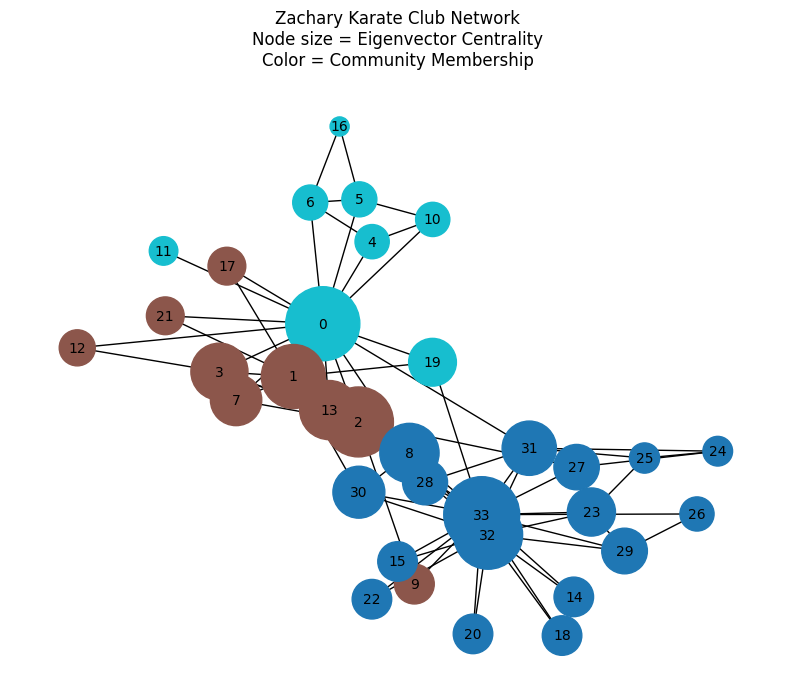

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# ============================================================
# 1. Load the classic dataset
# ============================================================
G = nx.karate_club_graph()
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


# ============================================================
# 2. Community detection (Greedy Modularity)
# ============================================================
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
print(f"Detected {len(communities)} communities")

# assign each node a community ID for coloring
comm_map = {}
for cid, community in enumerate(communities):
    for node in community:
        comm_map[node] = cid


# ============================================================
# 3. Compute centrality measures
# ============================================================
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)
eig_cent = nx.eigenvector_centrality(G)

print("Top 5 nodes by betweenness centrality:")
for node, score in sorted(bet_cent.items(), key=lambda x: -x[1])[:5]:
    print(f"Node {node}: {score:.3f}")


# ============================================================
# 4. Visualization
# ============================================================
plt.figure(figsize=(10, 8))

pos = nx.spring_layout(G, seed=42)  # reproducible layout

# node colors based on community ID
node_colors = [comm_map[n] for n in G.nodes()]

# node sizes based on eigenvector centrality (scaled)
node_sizes = [8000 * eig_cent[n] for n in G.nodes()]

nx.draw_networkx(
    G,
    pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap="tab10",
    with_labels=True,
    font_size=10,
)

plt.title("Zachary Karate Club Network\nNode size = Eigenvector Centrality\nColor = Community Membership")
plt.axis("off")
plt.show()


In [2]:
pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.5 MB/s  0:00:00m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
